## 1. <a>Import Libraries</a>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest


from sklearn.metrics import silhouette_score

warnings.filterwarnings("ignore")

## 2. <a>Read Data</a>


In [2]:
df_transformed = pd.read_csv('../Data/Data_Log.csv')
df_transformed

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3.735304           0.597837   4.568506          0.000000   
1     8.071989           0.646627   0.000000          0.000000   
2     7.822504           0.693147   6.651791          6.651791   
3     7.419183           0.492477   7.313220          7.313220   
4     6.707735           0.693147   2.833213          2.833213   
...        ...                ...        ...               ...   
8945  3.384170           0.693147   5.677165          0.000000   
8946  3.004851           0.693147   5.707110          0.000000   
8947  3.194529           0.606136   4.979489          0.000000   
8948  2.671218           0.606136   0.000000          0.000000   
8949  5.923475           0.510826   6.997824          6.997824   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   4.568506      0.000000             0.154151   
1                   0.000000      8.770896             0.000000   
2                   0.000000      0.000000             0.693147   
3                   0.000000      5.331694             0.080042   
4                   0.000000      0.000000             0.080042   
...                      ...           ...                  ...   
8945                5.677165      0.000000             0.693147   
8946                5.707110      0.000000             0.693147   
8947                4.979489      0.000000             0.606136   
8948                0.000000      3.625907             0.000000   
8949                0.000000      4.852343             0.510826   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.080042   
1                       0.000000                          0.000000   
2                       0.693147                          0.000000   
3                       0.080042                          0.000000   
4                       0.080042                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.606136   
8946                    0.000000                          0.606136   
8947                    0.000000                          0.510826   
8948                    0.000000                          0.000000   
8949                    0.510826                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000          0.000000       1.098612      6.908755   
1                   0.223144          1.609438       0.000000      8.853808   
2                   0.000000          0.000000       2.564949      8.922792   
3                   0.080042          0.693147       0.693147      8.922792   
4                   0.000000          0.000000       0.693147      7.090910   
...                      ...               ...            ...           ...   
8945                0.000000          0.000000       1.945910      6.908755   
8946                0.000000          0.000000       1.945910      6.908755   
8947                0.000000          0.000000       1.791759      6.908755   
8948                0.154151          1.098612       0.000000      6.216606   
8949                0.287682          1.098612       3.178054      7.090910   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0     5.312231          4.945277          0.000000  2.564949  
1     8.319725          6.978531          0.200671  2.564949  
2     6.434654          6.442994          0.000000  2.564949  
3     0.000000          5.747301          0.000000  2.564949  
4     6.521114          5.504483          0.000000  2.564949  
...        ...               ...               ...       ...  
8945  5.788719          3.909748          0.405465  1.945910  
8946  5.623517          5.747301          0.000000  1.945910  
8947  4.410016          4.423869          0.223144  

In [3]:
df_transformed.describe().T

count      mean       std       min  \
BALANCE                           8950.0  6.161637  2.013303  0.000000   
BALANCE_FREQUENCY                 8950.0  0.619940  0.148590  0.000000   
PURCHASES                         8950.0  4.899647  2.916872  0.000000   
ONEOFF_PURCHASES                  8950.0  3.204274  3.246365  0.000000   
INSTALLMENTS_PURCHASES            8950.0  3.352403  3.082973  0.000000   
CASH_ADVANCE                      8950.0  3.319086  3.566298  0.000000   
PURCHASES_FREQUENCY               8950.0  0.361268  0.277317  0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0  0.158699  0.216672  0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0  0.270072  0.281852  0.000000   
CASH_ADVANCE_FREQUENCY            8950.0  0.113512  0.156716  0.000000   
CASH_ADVANCE_TRX                  8950.0  0.817570  1.009316  0.000000   
PURCHASES_TRX                     8950.0  1.894731  1.373856  0.000000   
CREDIT_LIMIT                      8950.0  8.094825  0.819629  3.931826   
PAYMENTS                          8950.0  6.624540  1.591763  0.000000   
MINIMUM_PAYMENTS                  8950.0  5.916079  1.169929  0.018982   
PRC_FULL_PAYMENT                  8950.0  0.117730  0.211617  0.000000   
TENURE                            8950.0  2.519680  0.130367  1.945910   

                                       25%       50%       75%        max  
BALANCE                           4.861995  6.773521  7.628099   9.854515  
BALANCE_FREQUENCY                 0.635989  0.693147  0.693147   0.693147  
PURCHASES                         3.704627  5.892417  7.013133  10.800403  
ONEOFF_PURCHASES                  0.000000  3.663562  6.360274  10.615512  
INSTALLMENTS_PURCHASES            0.000000  4.499810  6.151961  10.021315  
CASH_ADVANCE                      0.000000  0.000000  7.016449  10.760839  
PURCHASES_FREQUENCY               0.080042  0.405465  0.650588   0.693147  
ONEOFF_PURCHASES_FREQUENCY        0.000000  0.080042  0.262364   0.693147  
PURCHASES_INSTALLMENTS_FREQUENCY  0.000000  0.154151  0.559616   0.693147  
CASH_ADVANCE_FREQUENCY            0.000000  0.000000  0.200671   0.916291  
CASH_ADVANCE_TRX                  0.000000  0.000000  1.609438   4.820282  
PURCHASES_TRX                     0.693147  2.079442  2.890372   5.883322  
CREDIT_LIMIT                      7.378384  8.006701  8.779711  10.308986  
PAYMENTS                          5.951361  6.754489  7.550732  10.834125  
MINIMUM_PAYMENTS                  5.146667  5.747301  6.671670  11.243832  
PRC_FULL_PAYMENT                  0.000000  0.000000  0.133531   0.693147  
TENURE                            2.564949  2.564949  2.564949   2.564949

## 3. <a>TSNE Visualize Data</a>


In [4]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, 
            perplexity=50,  
            random_state=42,
            n_iter=300).fit_transform(df_transformed)

In [5]:
df_embed = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed



feature1   feature2
0    -2.409307   5.554878
1    -2.844329  -7.993651
2     1.829076 -11.240090
3     7.252261  -1.672010
4    -1.244534  -9.706081
...        ...        ...
8945 -3.826327   6.986216
8946 -3.244401   7.317148
8947 -1.491736   6.479622
8948 -4.116828  -0.501244
8949  9.297261  -4.594840

[8950 rows x 2 columns]

[Text(0.5, 1.0, 'All Data')]

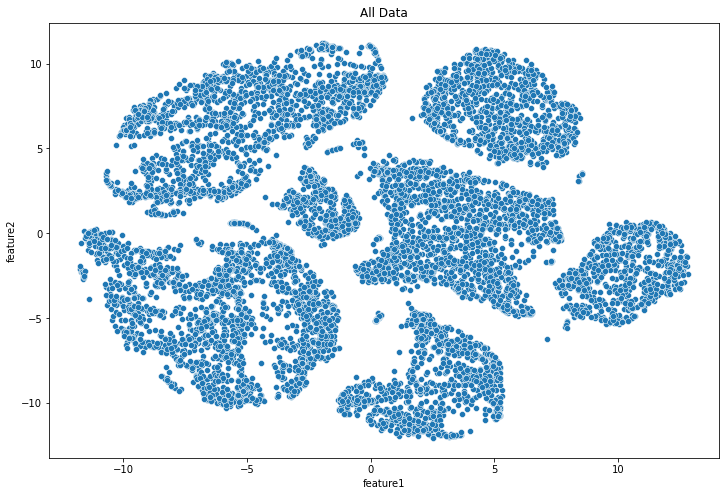

In [6]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed,    
    palette=sns.color_palette("hls", 2)
).set(title='All Data')

# Clustreing


## 1. <a>K-Means</a>


#### First, Select number of clusters (k) using Elbow Method 

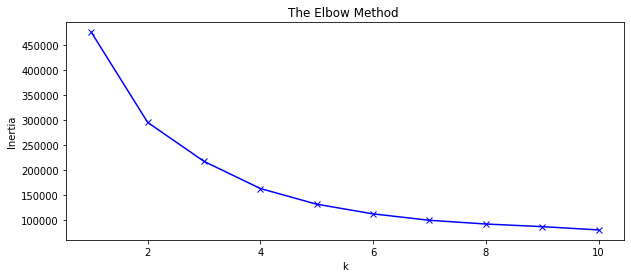

In [7]:
# To plot Elbow With Inertia 
inertia = []
Range = [*range(1,11)]

for k in Range: 
    kmean = KMeans(n_clusters=k, max_iter=300, random_state=42)
    kmean.fit(df_transformed)
    inertia.append(kmean.inertia_)
    
plt.figure(figsize=(10,4))
plt.plot(Range, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method ')
plt.show()

In [8]:
# To calc. the best number of k from elbow method curve
drop_variation = []
drop_variation.append(0) #add 0 in the first element 

for i in range(len(inertia) -1):
    dropValue = inertia[i] - inertia[i+1]
    drop_variation.append(dropValue) 

# select suitable k that have large drop in the variation
k = Range[np.argmax(drop_variation)]
print("Suitable number of clusters = ",k)

Suitable number of clusters =  2


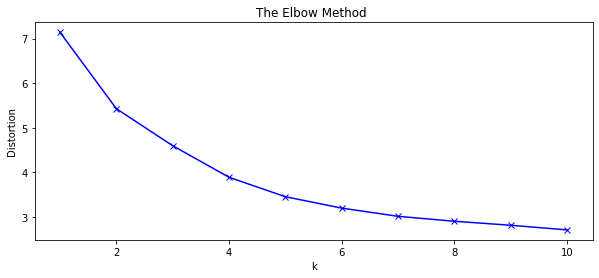

In [9]:
# To plot Elbow With Distortion 
from scipy.spatial.distance import cdist
distortions = []
Range = [*range(1,11)]

for n in Range:
    kmean = KMeans(n_clusters=n, max_iter=300, random_state=42)
    kmean.fit(df_transformed)
    distortions.append(np.average(np.min(cdist(df_transformed, kmean.cluster_centers_, 'euclidean'), axis=1)))
    
plt.figure(figsize=(10,4))
plt.plot(Range, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method ')
plt.show()

###  KMean in Sklearn

In [10]:
# use sklearn 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42).fit(df_transformed)

labels = kmeans.labels_
iner = kmeans.inertia_
cent = kmeans.cluster_centers_

print("\t~~ THIS RESULT OF K-mean SKLEARN  ~~")
print('~'*50)
print("sum of elements that contain in cluster 0 :",(labels == 0).sum())
print("sum of elements that contain in cluster 1 :",(labels == 1).sum())
print("sum of elements that contain in cluster 2 :",(labels == 2).sum())
print("sum of elements that contain in cluster 3 :",(labels == 3).sum())
#print("sum of elements that contain in cluster 4 :",(labels == 4).sum())

print('-'*50)

#print(iner)
#print(cent)

	~~ THIS RESULT OF K-mean SKLEARN  ~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sum of elements that contain in cluster 0 : 2087
sum of elements that contain in cluster 1 : 2133
sum of elements that contain in cluster 2 : 2755
sum of elements that contain in cluster 3 : 1975
--------------------------------------------------


In [11]:
# Calc. silhouette score for kmean sklearn
from sklearn.metrics import silhouette_score

score = silhouette_score(df_transformed,  labels, metric='euclidean')
print('Silhouett Score: %.3f' % score)

Silhouett Score: 0.400


In [12]:
# Calc. silhoutte score for different k
for i in [*range(2,7)]:
    kmeans = KMeans(n_clusters=i, random_state=42).fit(df_transformed)
    label = kmeans.labels_
    print("For n_clusters =",i,"The average silhouette_score is :",silhouette_score(df_transformed,  label, metric='euclidean'))

For n_clusters = 2 The average silhouette_score is : 0.3653855114655234
For n_clusters = 3 The average silhouette_score is : 0.37702776781255953
For n_clusters = 4 The average silhouette_score is : 0.39978067551928825
For n_clusters = 5 The average silhouette_score is : 0.42426901775467135
For n_clusters = 6 The average silhouette_score is : 0.4375982026248735


We notice that silhoutte Score will be better for 6 Clusters (k = 6)

In [13]:
from sklearn.metrics import davies_bouldin_score
score = davies_bouldin_score(df_transformed, labels)
print('Davies bouldin score: %.3f' % score)

Davies bouldin score: 1.098


The main motive is to decrease the DB index. 

In [14]:
from sklearn.metrics import calinski_harabasz_score
score = calinski_harabasz_score(df_transformed, labels)
print('Calinski harabasz score: %.3f' % score)

Calinski harabasz score: 5711.872


##### TSNE

In [15]:
df_embed_kmeans = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_kmeans['Clusters']= pd.DataFrame(labels)
df_embed_kmeans

feature1   feature2  Clusters
0    -2.409307   5.554878         3
1    -2.844329  -7.993651         1
2     1.829076 -11.240090         2
3     7.252261  -1.672010         0
4    -1.244534  -9.706081         2
...        ...        ...       ...
8945 -3.826327   6.986216         3
8946 -3.244401   7.317148         3
8947 -1.491736   6.479622         3
8948 -4.116828  -0.501244         1
8949  9.297261  -4.594840         0

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

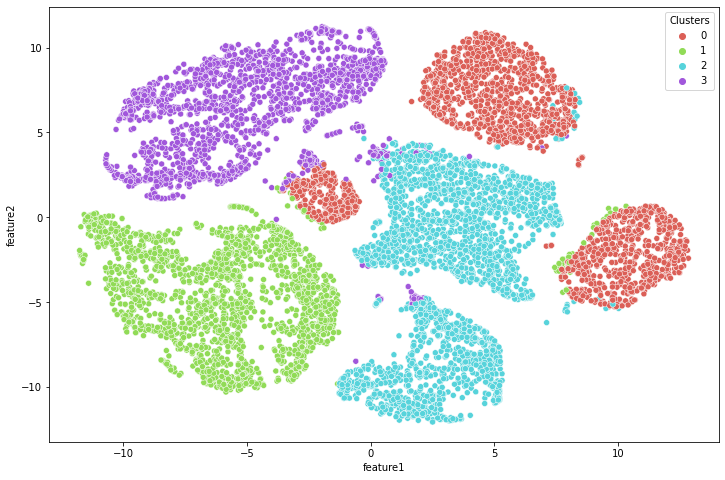

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', 
    y='feature2',
    data=df_embed_kmeans,    
    hue=df_embed_kmeans['Clusters'],
    palette=sns.color_palette("hls", 4)
)

## 2. <a>DBSCAN</a>


#### Calculate Knn-Matrix 

In [17]:
from sklearn.neighbors import NearestNeighbors
# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
min_s = 10
knn = NearestNeighbors(n_neighbors=min_s+1)
knn.fit(df_transformed)
distances, neighbors = knn.kneighbors(df_transformed)

# distances ---> distance of each point to k nearest neighbours for it
# neighbors ---> index of k nearest neighbors to each poi nt

In [18]:
neighbors  # nearest neighbours for each point in data

array([[   0, 7790, 8020, ..., 7183, 6092, 3029],
       [   1, 8119, 2348, ...,  962,  989, 3645],
       [   2,  604,  267, ..., 3177, 3657, 1414],
       ...,
       [8947, 5291, 8942, ..., 6617, 8100, 8695],
       [8948, 8244, 8884, ..., 6892, 8842, 5518],
       [8949, 8554,  549, ..., 8655, 7255, 1587]], dtype=int64)

In [19]:
# sort the distances, take last column only and sort them 
distances = np.sort(distances[:, -1], axis = 0) 

##### Elbow Method

Text(0.5, 1.0, 'Elbow Method for Choosing eps')

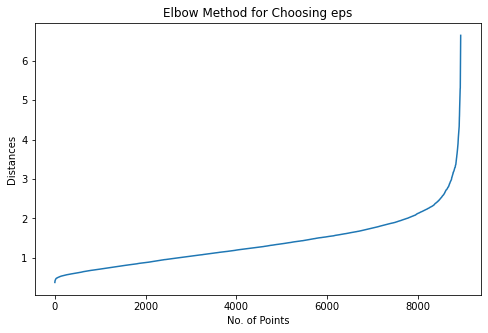

In [20]:
# plot elbow curve to choose first suitable epsilon from it
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.xlabel("No. of Points")
plt.ylabel("Distances")
plt.title("Elbow Method for Choosing eps")

#### From Elbow curve we can choose epsilon that give us less noise and good clustering

In [21]:
clustering_DB_1 = DBSCAN(eps=3.1, min_samples=10).fit(df_transformed)
label_DBScan_1 = clustering_DB_1.labels_

In [22]:
pd.DataFrame(label_DBScan_1).value_counts()

 0    8861
-1      55
 1      21
 2      13
dtype: int64

### Calc. Silhouette score for DBSCAN 

In [23]:
# Drop Noise points before calc. silhouette score
df_copy_1 = df_transformed.copy()
df_copy_1['Labels'] = label_DBScan_1
df_copy_1_clustered = df_copy_1.loc[(df_copy_1.Labels >= 0)] # dataframe of data without noise points 
df_copy_1_clustered_labels = df_copy_1_clustered['Labels']
df_copy_1_clustered.drop('Labels', axis=1, inplace=True)

In [24]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df_copy_1_clustered, df_copy_1_clustered_labels, metric='euclidean')
print('Silhouett Score: %.3f' % score)

Silhouett Score: 0.021


In [25]:
from sklearn.metrics import davies_bouldin_score
score = davies_bouldin_score(df_copy_1_clustered, df_copy_1_clustered_labels)
print('Davies bouldin score: %.3f' % score)

Davies bouldin score: 1.044


The main motive is to decrease the DB index. 

In [26]:
from sklearn.metrics import calinski_harabasz_score
score = calinski_harabasz_score(df_copy_1_clustered, df_copy_1_clustered_labels)
print('Calinski harabasz score: %.3f' % score)

Calinski harabasz score: 25.972


##### TSNE

In [27]:
df_embed_dbscan = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_dbscan['Clusters']= pd.DataFrame(label_DBScan_1)
df_embed_dbscan

feature1   feature2  Clusters
0    -2.409307   5.554878         0
1    -2.844329  -7.993651         0
2     1.829076 -11.240090         0
3     7.252261  -1.672010         1
4    -1.244534  -9.706081         0
...        ...        ...       ...
8945 -3.826327   6.986216         0
8946 -3.244401   7.317148         0
8947 -1.491736   6.479622         0
8948 -4.116828  -0.501244         0
8949  9.297261  -4.594840         0

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

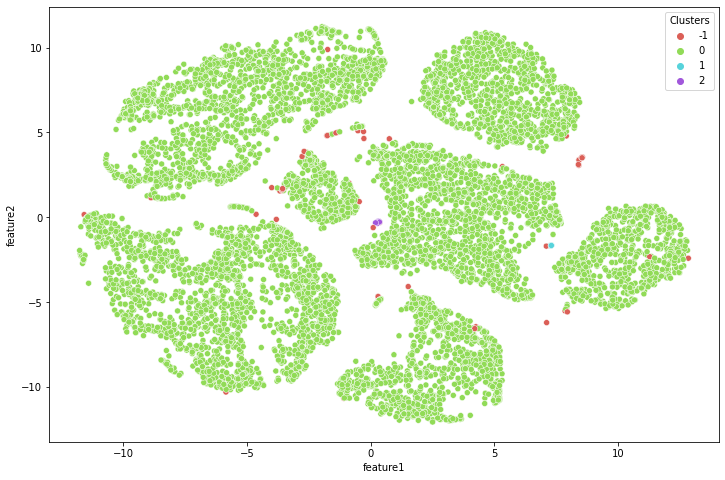

In [28]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_dbscan,    
    hue=df_embed_dbscan['Clusters'],
    palette=sns.color_palette("hls", 4)
)


## 3. <a>hierarchical</a>


##### Dendrogram

Text(20, 350, 'Cut off')

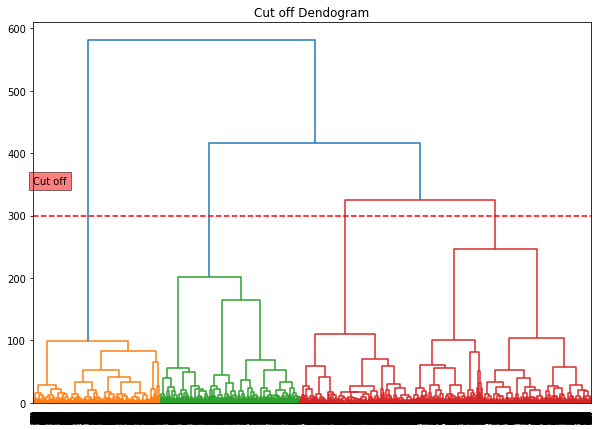

In [29]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Cut off Dendogram")
dend = shc.dendrogram(shc.linkage(y=df_transformed , method='ward',metric='euclidean'))
plt.axhline(y=300, color='r', linestyle='--')
plt.text(20, 350, "Cut off", bbox=dict(facecolor='red', alpha=0.5))

* From Dendrogram will take 4 clusters

In [30]:
from sklearn.cluster import AgglomerativeClustering

clustering_Agg = AgglomerativeClustering(n_clusters=4).fit(df_transformed)
hier_labels = clustering_Agg.labels_
hier_labels


array([1, 3, 0, ..., 1, 3, 2], dtype=int64)

#### Silhouette score for Hiererichal 

In [31]:
# Calc. silhouette score for hiereichal cluster
from sklearn.metrics import silhouette_score

score = silhouette_score(df_transformed,  hier_labels, metric='euclidean')
print('Silhouett Score: %.3f' % score)

Silhouett Score: 0.391


In [32]:
from sklearn.metrics import davies_bouldin_score
score = davies_bouldin_score(df_transformed, hier_labels)
print('Davies bouldin score: %.3f' % score)

Davies bouldin score: 1.126


The main motive is to decrease the DB index. 

In [33]:
from sklearn.metrics import calinski_harabasz_score
score = calinski_harabasz_score(df_transformed, hier_labels)
print('Calinski harabasz score: %.3f' % score)

Calinski harabasz score: 5482.411


##### TSNE

In [34]:
df_embed_hier = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_hier['Clusters']= pd.DataFrame(hier_labels)
df_embed_hier

feature1   feature2  Clusters
0    -2.409307   5.554878         1
1    -2.844329  -7.993651         3
2     1.829076 -11.240090         0
3     7.252261  -1.672010         0
4    -1.244534  -9.706081         0
...        ...        ...       ...
8945 -3.826327   6.986216         1
8946 -3.244401   7.317148         1
8947 -1.491736   6.479622         1
8948 -4.116828  -0.501244         3
8949  9.297261  -4.594840         2

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

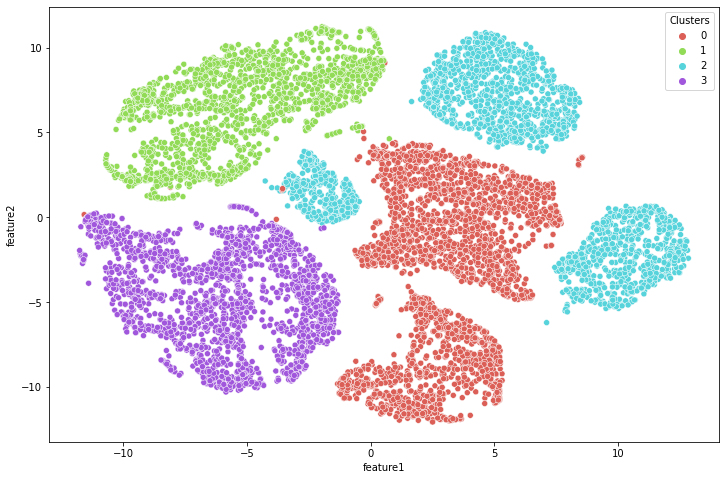

In [35]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_hier,    
    hue=df_embed_hier['Clusters'],
    palette=sns.color_palette("hls", 4)
)


# Anomaly Detection

## 1. <a>Isolated Random Forest</a>


In [36]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0, 
                      max_features=2,
                      n_estimators=100,
                      contamination=0.1).fit(df_transformed)

anom_pred = clf.predict(df_transformed)
anom_pred

array([ 1,  1,  1, ..., -1, -1, -1])

In [37]:
pd.DataFrame(anom_pred).value_counts()

 1    8055
-1     895
dtype: int64

##### TSNE

In [38]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(anom_pred)
df_embed_Iso

feature1   feature2  Labels
0    -2.409307   5.554878       1
1    -2.844329  -7.993651       1
2     1.829076 -11.240090       1
3     7.252261  -1.672010       1
4    -1.244534  -9.706081       1
...        ...        ...     ...
8945 -3.826327   6.986216       1
8946 -3.244401   7.317148       1
8947 -1.491736   6.479622      -1
8948 -4.116828  -0.501244      -1
8949  9.297261  -4.594840      -1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

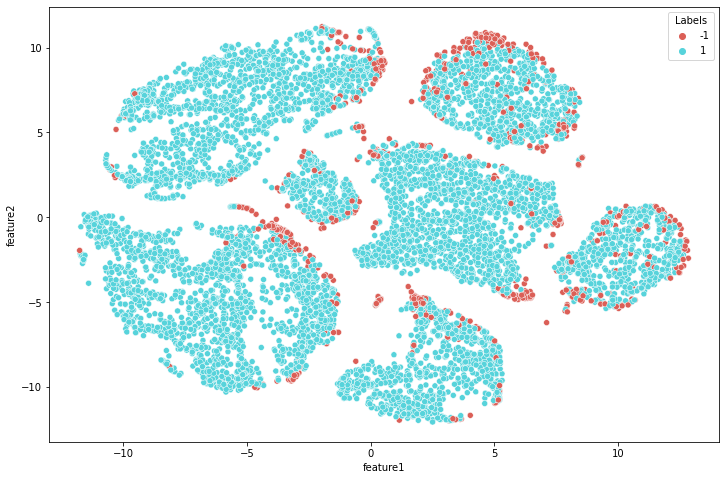

In [39]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 2)
)


## 2. <a>EM</a>


In [40]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=42).fit(df_transformed)

In [41]:
scores = gm.score_samples(df_transformed)
thresh = np.quantile(scores, .05)
gm_result=[-1 if val<= thresh else 1 for val in scores]
pd.DataFrame(gm_result).value_counts()

 1    8502
-1     448
dtype: int64

##### TSNE

In [42]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(gm_result)
df_embed_Iso

feature1   feature2  Labels
0    -2.409307   5.554878       1
1    -2.844329  -7.993651       1
2     1.829076 -11.240090       1
3     7.252261  -1.672010       1
4    -1.244534  -9.706081       1
...        ...        ...     ...
8945 -3.826327   6.986216       1
8946 -3.244401   7.317148      -1
8947 -1.491736   6.479622       1
8948 -4.116828  -0.501244       1
8949  9.297261  -4.594840       1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

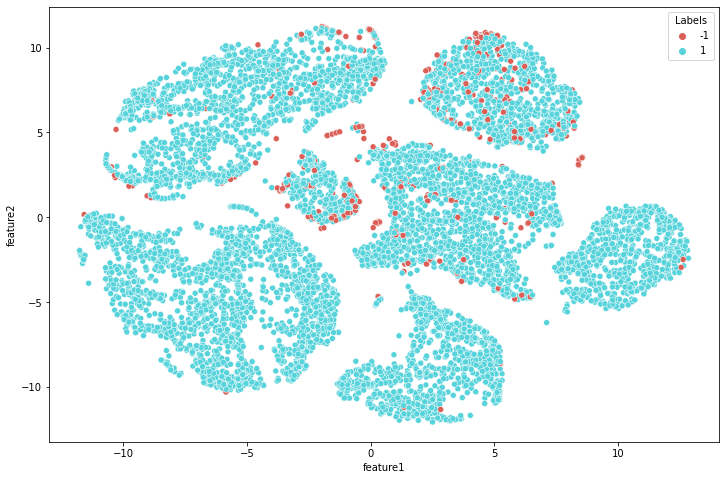

In [43]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 2)
)


## 3. <a>DBSCAN</a>


In [44]:
DB = DBSCAN(eps=4.3, min_samples=17).fit(df_transformed)
label_DBScan = DB.labels_

In [45]:
pd.DataFrame(label_DBScan).value_counts()

 0    8936
-1      14
dtype: int64

##### TSNE

In [46]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(label_DBScan)
df_embed_Iso

feature1   feature2  Labels
0    -2.409307   5.554878       0
1    -2.844329  -7.993651       0
2     1.829076 -11.240090       0
3     7.252261  -1.672010       0
4    -1.244534  -9.706081       0
...        ...        ...     ...
8945 -3.826327   6.986216       0
8946 -3.244401   7.317148       0
8947 -1.491736   6.479622       0
8948 -4.116828  -0.501244       0
8949  9.297261  -4.594840       0

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

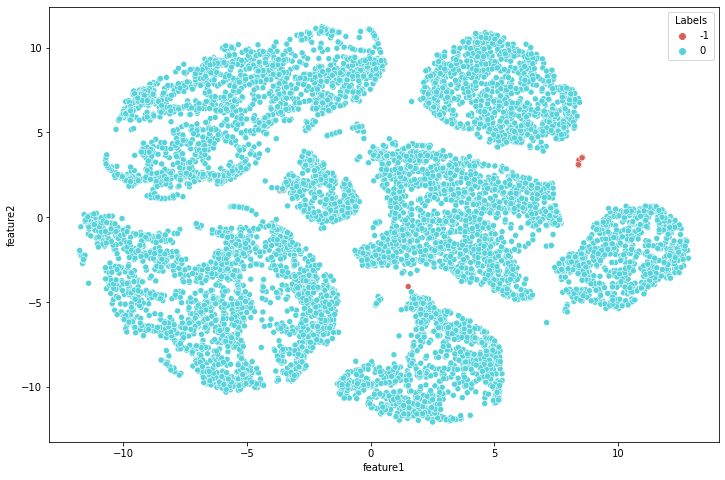

In [47]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 2)
)


# Dimensionality Reduction


## 1.<a> PCA </a>
#### Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. 

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
df_pca=pd.DataFrame(pca.fit_transform(df_transformed))
df_pca.shape

(8950, 5)

In [49]:
df_pca

0         1         2         3         4
0     1.010445 -5.609732  0.754728  0.315076  0.149192
1    -8.968889  1.538860  0.982578 -1.267686 -1.298086
2     2.618512  1.327342 -4.979454 -2.422621  0.929958
3    -0.308164  2.977761 -4.672681  3.206048  6.131599
4    -1.233563 -2.717809 -3.712014 -2.564981 -0.040413
...        ...       ...       ...       ...       ...
8945  2.439560 -5.511084  1.712818  1.079065 -0.559678
8946  2.406843 -5.369036  1.856408  0.741502  0.040756
8947  1.660997 -5.979347  0.986677  1.333615  0.660114
8948 -5.676552 -5.423244 -2.231756  2.536824  0.077923
8949  0.531389  2.756219 -4.184511  3.092374  1.793318

[8950 rows x 5 columns]

## 2. <a> Kernal-PCA </a>
#### Non-linear dimensionality reduction through the use of kernels 

In [50]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=10, kernel='rbf')
df_kpca = pd.DataFrame(kpca.fit_transform(df_transformed))
df_kpca

0         1         2         3         4         5         6  \
0    -0.322024  0.516047  0.085217  0.036215 -0.015608 -0.013188 -0.345512   
1     0.571038  0.078448  0.114536  0.005173 -0.033539  0.586146 -0.004310   
2    -0.097995 -0.181926 -0.298064  0.500376 -0.085155  0.017446  0.030665   
3    -0.031012 -0.038757 -0.127563 -0.017882  0.049901 -0.002018  0.004615   
4    -0.042195 -0.045667 -0.203879  0.215753 -0.010849 -0.072370  0.016403   
...        ...       ...       ...       ...       ...       ...       ...   
8945 -0.376092  0.612240  0.150075  0.016713 -0.014451  0.003618 -0.282473   
8946 -0.373469  0.605441  0.145621  0.015209 -0.013303  0.002802 -0.247563   
8947 -0.326389  0.532047  0.093867  0.027570 -0.015974 -0.005210 -0.444072   
8948  0.052839 -0.013372 -0.091298 -0.008970  0.022265 -0.223196 -0.010937   
8949 -0.046451 -0.076523 -0.235957  0.025098  0.191674  0.006375 -0.012778   

             7         8         9  
0     0.052362  0.067164  0.204233  
1     0.012051  0.002466  0.001755  
2     0.070862 -0.147242  0.267388  
3     0.049781  0.032890 -0.013316  
4     0.047356  0.017663  0.074450  
...        ...       ...       ...  
8945  0.008226 -0.007720  0.018540  
8946  0.017263 -0.006531  0.050644  
8947  0.050256  0.070342  0.165628  
8948  0.064317  0.052705 -0.028263  
8949 -0.017814 -0.028892 -0.009289  

[8950 rows x 10 columns]

# Clustering + PCA

## KMean + PCA

In [51]:
# use sklearn 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42).fit(df_pca)

labels = kmeans.labels_
iner = kmeans.inertia_
cent = kmeans.cluster_centers_

print("\t~~ THIS RESULT OF K-mean SKLEARN  ~~")
print('~'*50)
print("sum of elements that contain in cluster 0 :",(labels == 0).sum())
print("sum of elements that contain in cluster 1 :",(labels == 1).sum())
print("sum of elements that contain in cluster 2 :",(labels == 2).sum())
print("sum of elements that contain in cluster 3 :",(labels == 3).sum())
#print("sum of elements that contain in cluster 4 :",(labels == 4).sum())

print('-'*50)

#print(iner)
#print(cent)

	~~ THIS RESULT OF K-mean SKLEARN  ~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sum of elements that contain in cluster 0 : 2148
sum of elements that contain in cluster 1 : 2745
sum of elements that contain in cluster 2 : 2068
sum of elements that contain in cluster 3 : 1989
--------------------------------------------------


In [52]:
score = silhouette_score(df_pca,  labels, metric='euclidean')
print('Silhouett Score: %.3f' % score)

Silhouett Score: 0.425


Using PCA made Silhoutte score increase

In [53]:
df_embed_kmeans = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_kmeans['Clusters']= pd.DataFrame(labels)
df_embed_kmeans

feature1   feature2  Clusters
0    -2.409307   5.554878         3
1    -2.844329  -7.993651         0
2     1.829076 -11.240090         1
3     7.252261  -1.672010         2
4    -1.244534  -9.706081         1
...        ...        ...       ...
8945 -3.826327   6.986216         3
8946 -3.244401   7.317148         3
8947 -1.491736   6.479622         3
8948 -4.116828  -0.501244         0
8949  9.297261  -4.594840         2

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

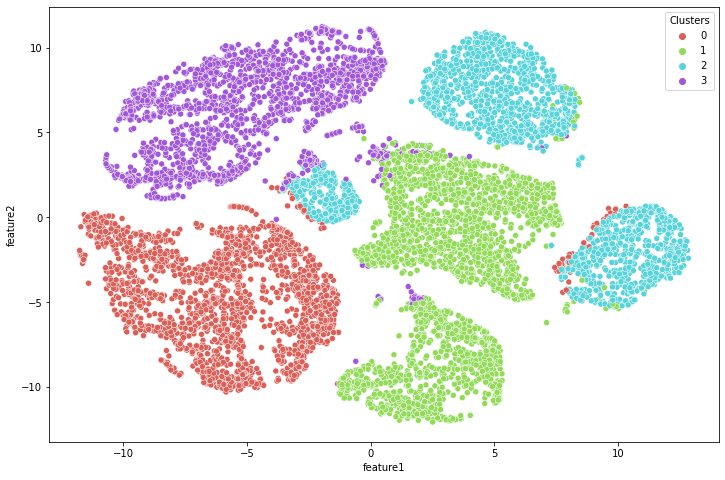

In [54]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', 
    y='feature2',
    data=df_embed_kmeans,    
    hue=df_embed_kmeans['Clusters'],
    palette=sns.color_palette("hls", 4)
)

## DBSCAN + PCA

In [55]:
# when we use PCA with DBSCAN with same epsilon can notice that classes become 2 and noise points decrease
clustering_DB_1 = DBSCAN(eps=3.1, min_samples=10).fit(df_pca)
label_DBScan_1 = clustering_DB_1.labels_

In [56]:
pd.DataFrame(label_DBScan_1).value_counts()

 0    8905
-1      23
 1      22
dtype: int64

## Hierarchical + PCA

In [57]:
clustering_Agg = AgglomerativeClustering(n_clusters=4).fit(df_pca)
hier_labels = clustering_Agg.labels_
hier_labels


array([1, 3, 0, ..., 1, 3, 2], dtype=int64)

In [58]:

score = silhouette_score(df_pca,  hier_labels, metric='euclidean')
print('Silhouett Score: %.3f' % score)

Silhouett Score: 0.414


In [59]:
df_embed_kmeans = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_kmeans['Clusters']= pd.DataFrame(hier_labels)
df_embed_kmeans

feature1   feature2  Clusters
0    -2.409307   5.554878         1
1    -2.844329  -7.993651         3
2     1.829076 -11.240090         0
3     7.252261  -1.672010         0
4    -1.244534  -9.706081         0
...        ...        ...       ...
8945 -3.826327   6.986216         1
8946 -3.244401   7.317148         1
8947 -1.491736   6.479622         1
8948 -4.116828  -0.501244         3
8949  9.297261  -4.594840         2

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

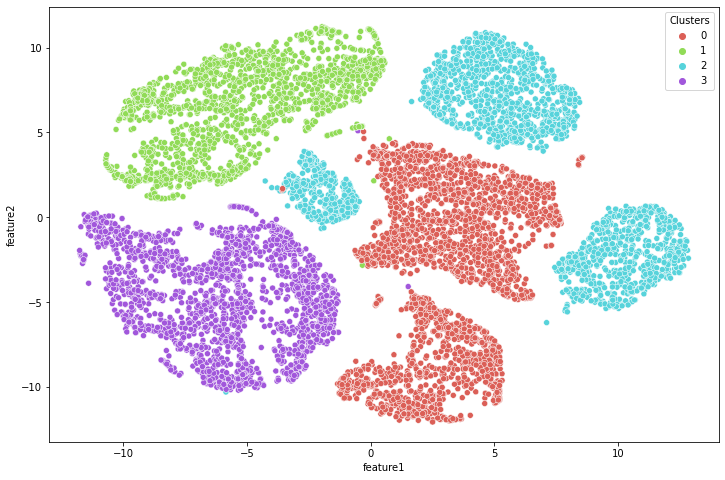

In [60]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', 
    y='feature2',
    data=df_embed_kmeans,    
    hue=df_embed_kmeans['Clusters'],
    palette=sns.color_palette("hls", 4)
)

# Anomaly Detection + PCA

## 1. <a>Isolated Random Forest + PCA </a>


In [61]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0, 
                      max_features=2,
                      n_estimators=100,
                      contamination=0.1).fit(df_pca)

anom_pred = clf.predict(df_pca)
anom_pred

array([ 1,  1,  1, ...,  1, -1,  1])

In [62]:
pd.DataFrame(anom_pred).value_counts()

 1    8055
-1     895
dtype: int64

##### TSNE

In [63]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(anom_pred)
df_embed_Iso

feature1   feature2  Labels
0    -2.409307   5.554878       1
1    -2.844329  -7.993651       1
2     1.829076 -11.240090       1
3     7.252261  -1.672010      -1
4    -1.244534  -9.706081       1
...        ...        ...     ...
8945 -3.826327   6.986216       1
8946 -3.244401   7.317148       1
8947 -1.491736   6.479622       1
8948 -4.116828  -0.501244      -1
8949  9.297261  -4.594840       1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

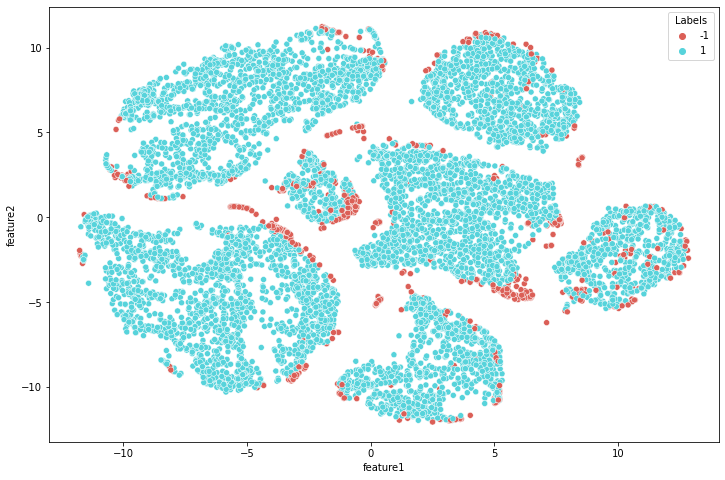

In [64]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 2)
)


## 2. <a>EM + PCA</a>


In [65]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=42).fit(df_pca)

In [66]:
scores = gm.score_samples(df_pca)
thresh = np.quantile(scores, .05)
gm_result=[-1 if val<= thresh else 1 for val in scores]
pd.DataFrame(gm_result).value_counts()

 1    8502
-1     448
dtype: int64

##### TSNE

In [67]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(gm_result)
df_embed_Iso

feature1   feature2  Labels
0    -2.409307   5.554878       1
1    -2.844329  -7.993651       1
2     1.829076 -11.240090       1
3     7.252261  -1.672010      -1
4    -1.244534  -9.706081       1
...        ...        ...     ...
8945 -3.826327   6.986216       1
8946 -3.244401   7.317148       1
8947 -1.491736   6.479622       1
8948 -4.116828  -0.501244       1
8949  9.297261  -4.594840       1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

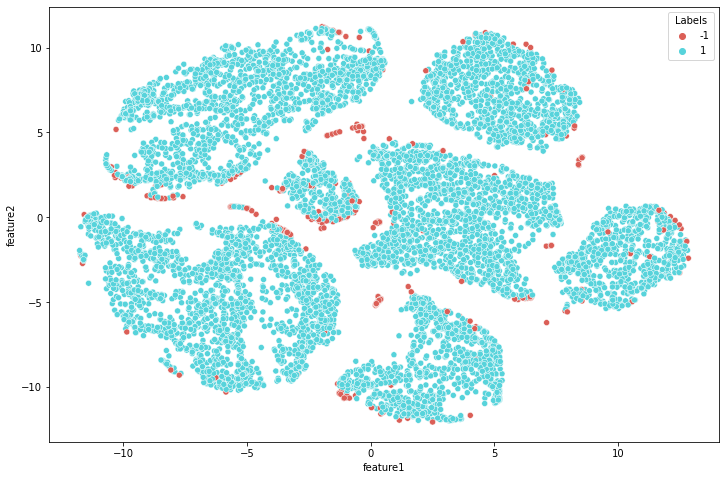

In [68]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 2)
)


## 3. <a>DBSCAN + PCA</a>


In [69]:
DB = DBSCAN(eps=4.3, min_samples=10).fit(df_pca)
label_DBScan = DB.labels_

In [70]:
pd.DataFrame(label_DBScan).value_counts()

0    8950
dtype: int64

Can notice that using DBSAN with same epsilon with PCA not give us noise points , rather than before give us 14 point noise.

##### TSNE

In [71]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(label_DBScan)
df_embed_Iso

feature1   feature2  Labels
0    -2.409307   5.554878       0
1    -2.844329  -7.993651       0
2     1.829076 -11.240090       0
3     7.252261  -1.672010       0
4    -1.244534  -9.706081       0
...        ...        ...     ...
8945 -3.826327   6.986216       0
8946 -3.244401   7.317148       0
8947 -1.491736   6.479622       0
8948 -4.116828  -0.501244       0
8949  9.297261  -4.594840       0

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

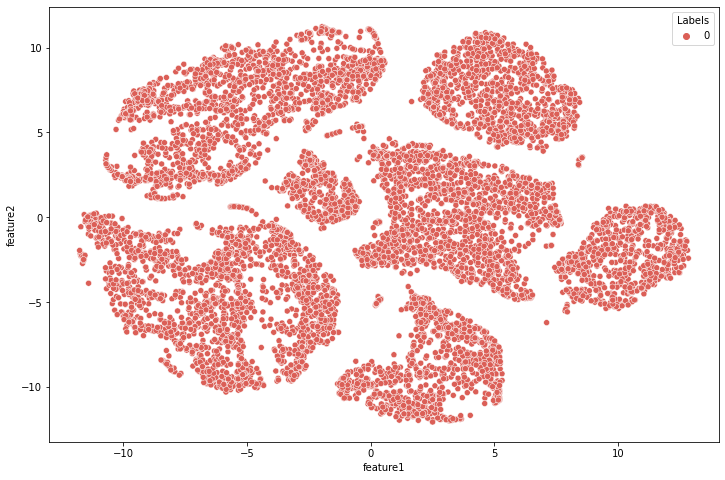

In [72]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 1)
)


# Clustering + KernalPCA

## KMean + KernalPCA

In [73]:
# use sklearn 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42).fit(df_kpca)

labels = kmeans.labels_
iner = kmeans.inertia_
cent = kmeans.cluster_centers_

print("\t~~ THIS RESULT OF K-mean SKLEARN  ~~")
print('~'*50)
print("sum of elements that contain in cluster 0 :",(labels == 0).sum())
print("sum of elements that contain in cluster 1 :",(labels == 1).sum())
print("sum of elements that contain in cluster 2 :",(labels == 2).sum())
print("sum of elements that contain in cluster 3 :",(labels == 3).sum())
#print("sum of elements that contain in cluster 4 :",(labels == 4).sum())

print('-'*50)

#print(iner)
#print(cent)

	~~ THIS RESULT OF K-mean SKLEARN  ~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sum of elements that contain in cluster 0 : 3849
sum of elements that contain in cluster 1 : 1599
sum of elements that contain in cluster 2 : 1868
sum of elements that contain in cluster 3 : 1634
--------------------------------------------------


In [74]:
score = silhouette_score(df_kpca,  labels, metric='euclidean')
print('Silhouett Score: %.3f' % score)

Silhouett Score: 0.368


In [75]:
df_embed_kmeans = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_kmeans['Clusters']= pd.DataFrame(labels)
df_embed_kmeans

feature1   feature2  Clusters
0    -2.409307   5.554878         3
1    -2.844329  -7.993651         2
2     1.829076 -11.240090         0
3     7.252261  -1.672010         0
4    -1.244534  -9.706081         0
...        ...        ...       ...
8945 -3.826327   6.986216         3
8946 -3.244401   7.317148         3
8947 -1.491736   6.479622         3
8948 -4.116828  -0.501244         0
8949  9.297261  -4.594840         0

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

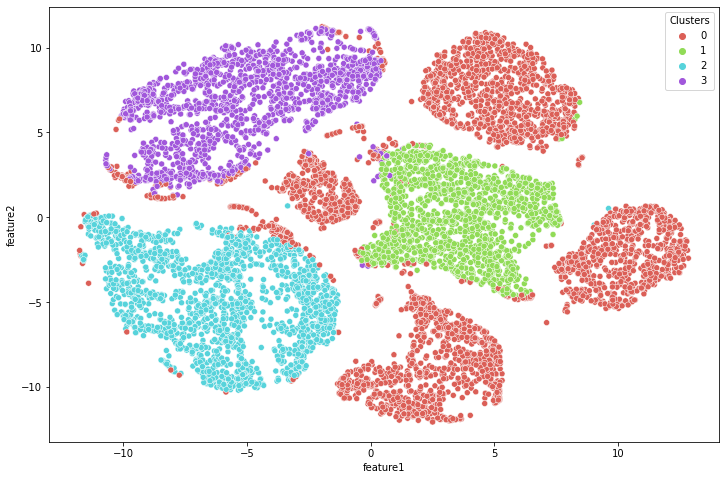

In [76]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', 
    y='feature2',
    data=df_embed_kmeans,    
    hue=df_embed_kmeans['Clusters'],
    palette=sns.color_palette("hls", 4)
)

## Hierarchical + KernalPCA

In [77]:
clustering_Agg = AgglomerativeClustering(n_clusters=4).fit(df_kpca)
hier_labels = clustering_Agg.labels_
hier_labels


array([2, 1, 0, ..., 2, 0, 0], dtype=int64)

In [78]:

score = silhouette_score(df_kpca,  hier_labels, metric='euclidean')
print('Silhouett Score: %.3f' % score)

Silhouett Score: 0.362


In [79]:
df_embed_kmeans = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_kmeans['Clusters']= pd.DataFrame(hier_labels)
df_embed_kmeans

feature1   feature2  Clusters
0    -2.409307   5.554878         2
1    -2.844329  -7.993651         1
2     1.829076 -11.240090         0
3     7.252261  -1.672010         0
4    -1.244534  -9.706081         0
...        ...        ...       ...
8945 -3.826327   6.986216         2
8946 -3.244401   7.317148         2
8947 -1.491736   6.479622         2
8948 -4.116828  -0.501244         0
8949  9.297261  -4.594840         0

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

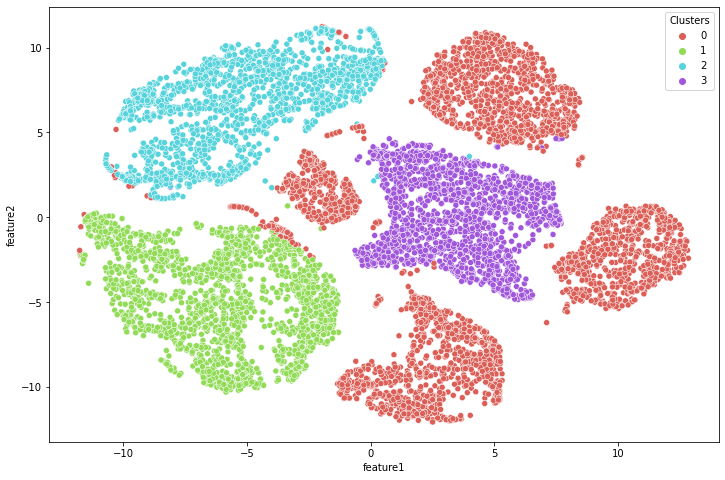

In [80]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', 
    y='feature2',
    data=df_embed_kmeans,    
    hue=df_embed_kmeans['Clusters'],
    palette=sns.color_palette("hls", 4)
)

## DBSCAN + KernalPCA

In [81]:
clustering_DB_1 = DBSCAN(eps=3.1, min_samples=10).fit(df_kpca)
label_DBScan_1 = clustering_DB_1.labels_

In [82]:
pd.DataFrame(label_DBScan_1).value_counts()

0    8950
dtype: int64

Same epsilon not give noise points at this case rather than result without using any dimensionality reduction or using PCA.

# Anomaly Detection + KernalPCA

## 1. <a>Isolated Random Forest + KernalPCA</a>


In [83]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0, 
                      max_features=2,
                      n_estimators=100,
                      contamination=0.1).fit(df_kpca)

anom_pred = clf.predict(df_kpca)
anom_pred

array([1, 1, 1, ..., 1, 1, 1])

In [84]:
pd.DataFrame(anom_pred).value_counts()

 1    8055
-1     895
dtype: int64

##### TSNE

In [85]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(anom_pred)
df_embed_Iso

feature1   feature2  Labels
0    -2.409307   5.554878       1
1    -2.844329  -7.993651       1
2     1.829076 -11.240090       1
3     7.252261  -1.672010       1
4    -1.244534  -9.706081       1
...        ...        ...     ...
8945 -3.826327   6.986216       1
8946 -3.244401   7.317148       1
8947 -1.491736   6.479622       1
8948 -4.116828  -0.501244       1
8949  9.297261  -4.594840       1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

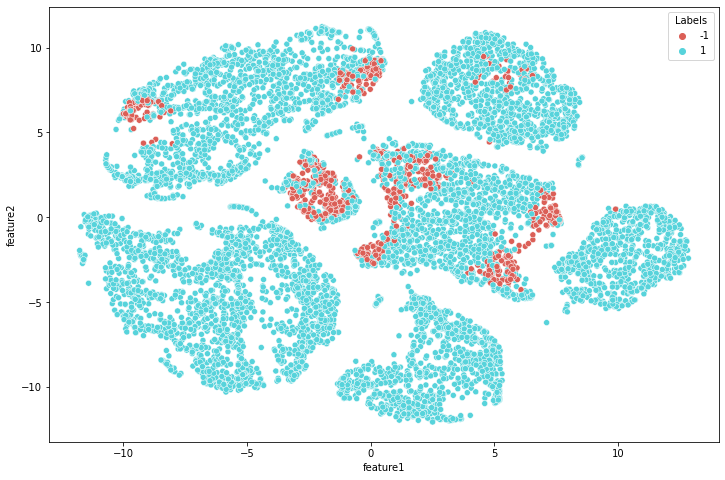

In [86]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 2)
)


## 2. <a>EM + KernalPCA</a>


In [87]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=42).fit(df_kpca)

In [88]:
scores = gm.score_samples(df_kpca)
thresh = np.quantile(scores, .05)
gm_result=[-1 if val<= thresh else 1 for val in scores]
pd.DataFrame(gm_result).value_counts()

 1    8502
-1     448
dtype: int64

##### TSNE

In [89]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(gm_result)
df_embed_Iso

feature1   feature2  Labels
0    -2.409307   5.554878       1
1    -2.844329  -7.993651       1
2     1.829076 -11.240090       1
3     7.252261  -1.672010       1
4    -1.244534  -9.706081       1
...        ...        ...     ...
8945 -3.826327   6.986216       1
8946 -3.244401   7.317148       1
8947 -1.491736   6.479622       1
8948 -4.116828  -0.501244       1
8949  9.297261  -4.594840       1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

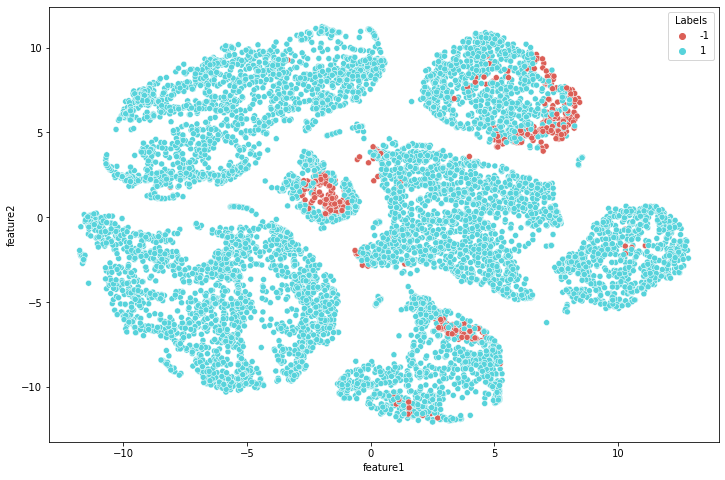

In [90]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 2)
)


## 3. <a>DBSCAN</a>


In [91]:
DB = DBSCAN(eps=3.1, min_samples=10).fit(df_kpca)
label_DBScan = DB.labels_

In [92]:
pd.DataFrame(label_DBScan).value_counts()

0    8950
dtype: int64

using Kernal-PCA at DBSCAN with same parameters not give any noise points 

----------------------------------------------------------------------------------------

#### NOTES
- hierarchical Clustering is the best algorithm result for clustering, kmeans also was good also, but DBSCAN is the worest one.

- Result (Score) when using dimensionality Reduction (PCA) became better, but (KernalPCA) not give better result

- I use different approaches to evaluate the perforamance of clustering models :
    <p> • Silhoutte Score </p>
    <p> • Davies Bouldin Score </p>
    <p> • Calinski Harabasz Score </p>
    <p> • TSNE Visualization </p>